In [1]:
#from: https://github.com/iShkiper/DSP_24.M20_21/blob/main/%D0%9A%D0%BE%D0%B4/1.8.1%20CWT_classification_on.ipynb
#dataset: https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones
#model design source: https://github.com/taspinar/siml/blob/master/notebooks/WV3%20-%20Classification%20of%20signals%20using%20the%20CWT%20and%20CNN.ipynb

In [2]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from tqdm import tqdm

In [3]:
activities_description = {
    1: 'walking',
    2: 'walking upstairs',
    3: 'walking downstairs',
    4: 'sitting',
    5: 'standing',
    6: 'laying'
}

def read_signals(filename):
    with open(filename, 'r') as fp:
        data = fp.read().splitlines()
        data = map(lambda x: x.rstrip().lstrip().split(), data)
        data = [list(map(float, line)) for line in data]
    return data

def read_labels(filename):        
    with open(filename, 'r') as fp:
        activities = fp.read().splitlines()
        activities = list(map(lambda x: int(x)-1, activities))
    return activities

def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation, :, :]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels

INPUT_FOLDER_TRAIN = 'D:/DSP_ZADACHI/HAR_Dataset/train/Inertial Signals/'
INPUT_FOLDER_TEST = 'D:/DSP_ZADACHI/HAR_Dataset/test/Inertial Signals/'

INPUT_FILES_TRAIN = ['body_acc_x_train.txt', 'body_acc_y_train.txt', 'body_acc_z_train.txt', 
                     'body_gyro_x_train.txt', 'body_gyro_y_train.txt', 'body_gyro_z_train.txt',
                     'total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']

INPUT_FILES_TEST = ['body_acc_x_test.txt', 'body_acc_y_test.txt', 'body_acc_z_test.txt', 
                     'body_gyro_x_test.txt', 'body_gyro_y_test.txt', 'body_gyro_z_test.txt',
                     'total_acc_x_test.txt', 'total_acc_y_test.txt', 'total_acc_z_test.txt']

LABELFILE_TRAIN = 'HAR_Dataset/train/y_train.txt'
LABELFILE_TEST = 'HAR_Dataset/test/y_test.txt'

train_signals, test_signals = [], []

In [4]:
for input_file in INPUT_FILES_TRAIN:
    signal = read_signals(INPUT_FOLDER_TRAIN + input_file)
    train_signals.append(signal)
train_signals = np.transpose(np.array(train_signals), (1, 2, 0))

for input_file in INPUT_FILES_TEST:
    signal = read_signals(INPUT_FOLDER_TEST + input_file)
    test_signals.append(signal)
test_signals = np.transpose(np.array(test_signals), (1, 2, 0))

train_labels = read_labels(LABELFILE_TRAIN)
test_labels = read_labels(LABELFILE_TEST)

[no_signals_train, no_steps_train, no_components_train] = np.shape(train_signals)
[no_signals_test, no_steps_test, no_components_test] = np.shape(test_signals)
no_labels = len(np.unique(train_labels[:]))

print("Обучающая выборка состоит из {} сигналов, каждый сигнал длины {} и из {} компонент ".format(no_signals_train, no_steps_train, no_components_train))
print("Тестовая выборка состоит из {} сигналов, каждый сигнал длины {} и из {} компонент ".format(no_signals_test, no_steps_test, no_components_test))
print("Обучающая выборка состоит из {} меток классов с распределением:\n {}".format(np.shape(train_labels)[0], Counter(train_labels[:])))
print("Тестовая выборка состоит из {} меток классовс распределением:\n {}".format(np.shape(test_labels)[0], Counter(test_labels[:])))

uci_har_signals_train, uci_har_labels_train = randomize(train_signals, np.array(train_labels))
uci_har_signals_test, uci_har_labels_test = randomize(test_signals, np.array(test_labels))

Обучающая выборка состоит из 7352 сигналов, каждый сигнал длины 128 и из 9 компонент 
Тестовая выборка состоит из 2947 сигналов, каждый сигнал длины 128 и из 9 компонент 
Обучающая выборка состоит из 7352 меток классов с распределением:
 Counter({5: 1407, 4: 1374, 3: 1286, 0: 1226, 1: 1073, 2: 986})
Тестовая выборка состоит из 2947 меток классовс распределением:
 Counter({5: 537, 4: 532, 0: 496, 3: 491, 1: 471, 2: 420})


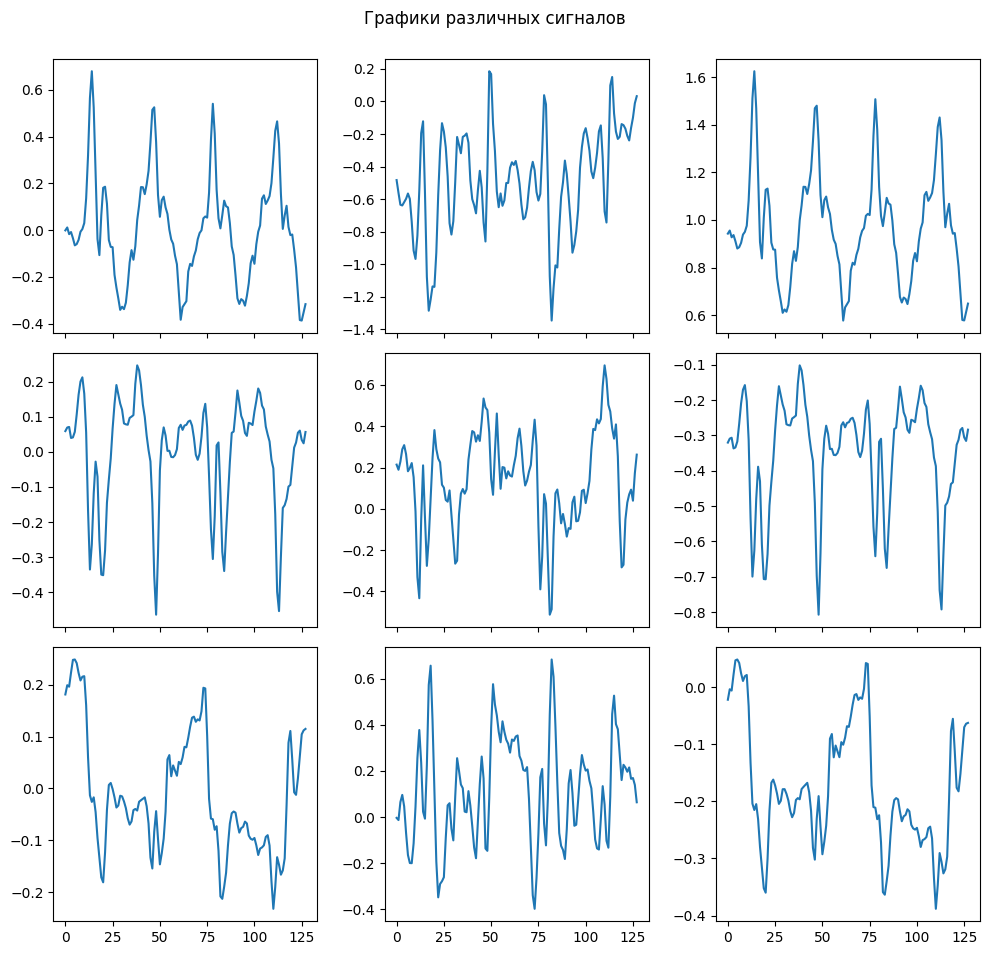

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10), sharex=True)
x = np.arange(0, 128, 1.0)
for i in range(3):
    for j in range(3):
        axs[i, j].plot(x, uci_har_signals_train[0,:,i+3*j])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Графики различных сигналов")
plt.show()

In [6]:
scales = range(1,128,2)
waveletname = 'morl'
len(scales)

64

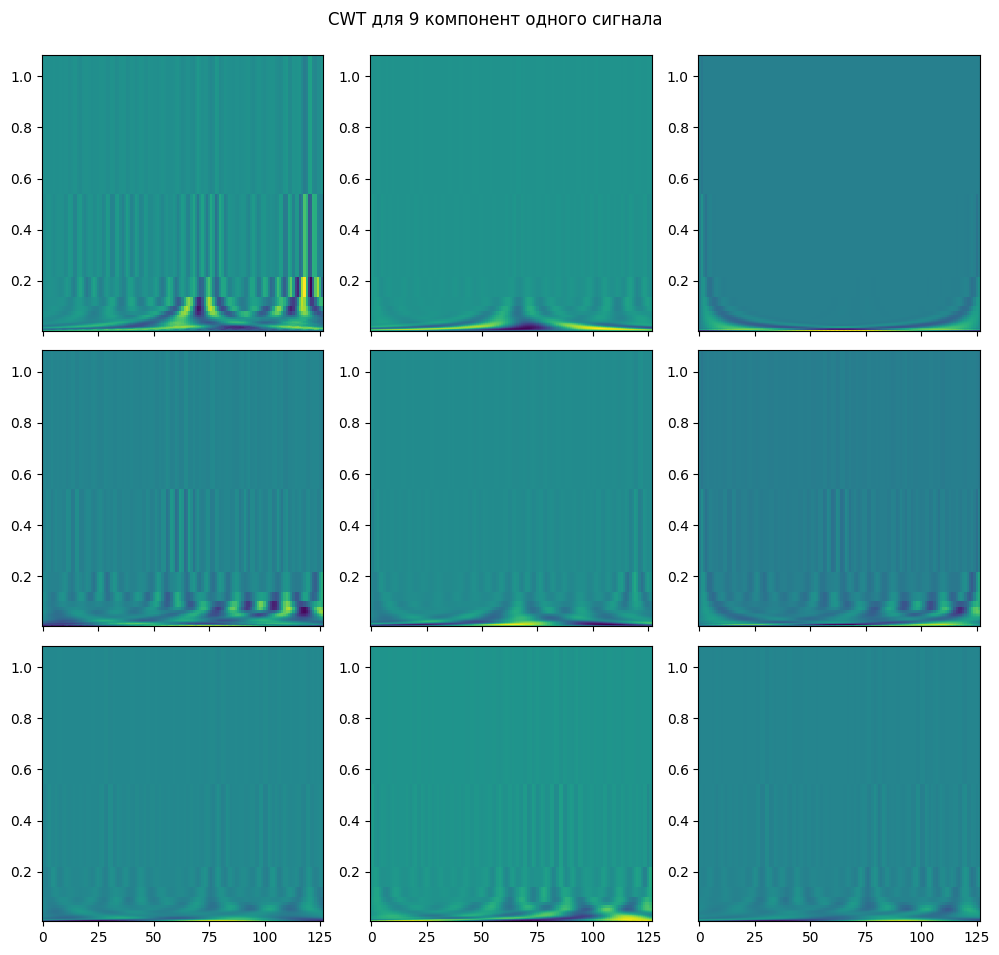

In [7]:
ii = 1000
data_cwt = np.ndarray(shape=(9, len(scales), 127))
freq_cwt = np.ndarray(shape=(9, len(scales)))

for jj in range(0,9):
    signal = uci_har_signals_train[ii, :, jj]
    coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
    coeff_ = coeff[:,:127]
    data_cwt[jj, :, :, ] = coeff_.astype('float32')
    freq_cwt[jj, :] = freq

fig, axs = plt.subplots(3, 3, figsize=(10, 10), sharex=True)

for i in range(3):
    for j in range(3):
        axs[i,j].pcolormesh(np.arange(127), freq_cwt[i+3*j], data_cwt[i+3*j])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("CWT для 9 компонент одного сигнала")
plt.show()

In [8]:
scales = range(1,128,2)
waveletname = 'morl'
train_size = 7352 
test_size = 2947

# Сформировать датасеты
train_data_cwt = np.ndarray(shape=(train_size, 9, len(scales), 127))
test_data_cwt = np.ndarray(shape=(test_size, 9, len(scales), 127))

In [9]:
x_train = train_data_cwt
y_train = np.asarray(uci_har_labels_train[:train_size])
x_test = test_data_cwt
y_test = np.asarray(uci_har_labels_test[:test_size])
num_classes = 6

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (7352, 9, 64, 127)
7352 train samples
2947 test samples


In [10]:
import torch
import torch.nn as nn

def encode_labels(labels, num_of_classes): # is it really necessary to encode labels?
    num = len(labels)
    target = torch.zeros(num, num_of_classes).float()
    for i, l in enumerate(labels):
        target[i, l] = 1
    return target

target_train = encode_labels(y_train, num_classes)
target_test = encode_labels(y_test, num_classes)

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class CWTDataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X.astype('float32')
        self.y = y.type(torch.FloatTensor) 
        #self.X = X
        #self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        x = self.X[idx]
        y = self.y[idx]
       
        if x.ndim == 2:
            x = x[np.newaxis, ...]
        if self.transform:
            x = self.transform(x)
        return torch.from_numpy(x), y

class SimpleCNN(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=5,stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(63488, 1000),  # make auto sizing
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(1000, num_classes)
        )
        

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x



In [12]:

from sklearn.model_selection import train_test_split

batch_size = 64

input_height, input_width = x_train.shape[1], x_train.shape[2]



train_ds = CWTDataset(x_train, target_train)
val_ds = CWTDataset(x_test, target_test)

    
  

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(in_channels=9, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-2)



In [13]:
# Функции обучения и оценки
def train_epoch(model, loader):
    model.train()
    loss_sum, correct, total = 0, 0, 0
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
        loss_sum += loss.item()*x.size(0)
        
        preds = out.argmax(dim=1)
        correct += (preds==y.argmax(dim=1)).sum().item()
        total += x.size(0)
    return loss_sum/total, correct/total


def eval_epoch(model, loader):
    model.eval()
    loss_sum, correct, total = 0, 0, 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            
            loss = criterion(out, y)
            loss_sum += loss.item()*x.size(0)
            preds = out.argmax(dim=1)
            correct += (preds==y.argmax(dim=1)).sum().item()
            total += x.size(0)
    return loss_sum/total, correct/total

In [18]:
# Тренировочный цикл
epochs = 50
for epoch in range(1, epochs+1):
    tr_loss, tr_acc = train_epoch(model, train_loader)
    val_loss, val_acc = eval_epoch(model, test_loader)
    print(f"Epoch {epoch}/{epochs}: train_loss={tr_loss:.4f}, train_acc={tr_acc:.4f}, "
          f"val_loss={val_loss:.4f}, val_acc={val_acc:.4f}")

Epoch 1/50: train_loss=1.7857, train_acc=0.1829, val_loss=1.7903, val_acc=0.1822
Epoch 2/50: train_loss=1.7856, train_acc=0.1892, val_loss=1.7933, val_acc=0.1822
Epoch 3/50: train_loss=1.7860, train_acc=0.1831, val_loss=1.7921, val_acc=0.1822
Epoch 4/50: train_loss=1.7860, train_acc=0.1821, val_loss=1.7935, val_acc=0.1822
Epoch 5/50: train_loss=1.7859, train_acc=0.1834, val_loss=1.7907, val_acc=0.1822
Epoch 6/50: train_loss=1.7858, train_acc=0.1859, val_loss=1.7907, val_acc=0.1822
Epoch 7/50: train_loss=1.7862, train_acc=0.1855, val_loss=1.7925, val_acc=0.1822
Epoch 8/50: train_loss=1.7867, train_acc=0.1854, val_loss=1.7935, val_acc=0.1822
Epoch 9/50: train_loss=1.7856, train_acc=0.1903, val_loss=1.7998, val_acc=0.1666
Epoch 10/50: train_loss=1.7863, train_acc=0.1911, val_loss=1.7910, val_acc=0.1822
Epoch 11/50: train_loss=1.7857, train_acc=0.1776, val_loss=1.7926, val_acc=0.1822
Epoch 12/50: train_loss=1.7862, train_acc=0.1902, val_loss=1.7924, val_acc=0.1666
Epoch 13/50: train_loss=1

KeyboardInterrupt: 

In [17]:
def eval_epoch_test(model, loader):
    model.eval()
    loss_sum, correct, total = 0, 0, 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            
            loss = criterion(out, y)
            loss_sum += loss.item()*x.size(0)
            preds = out.argmax(dim=1)
            correct += (preds==y.argmax(dim=1)).sum().item()
            #print(preds)
            #print(y.argmax(dim=1))
            print(correct)
            total += x.size(0)
            print(total)
            
    return loss_sum/total, correct/total


val_loss, val_acc = eval_epoch_test(model, test_loader)
print(val_acc)

10
64
21
128
33
192
38
256
50
320
62
384
76
448
88
512
94
576
104
640
116
704
131
768
139
832
153
896
170
960
182
1024
194
1088
207
1152
216
1216
227
1280
238
1344
251
1408
260
1472
274
1536
291
1600
302
1664
318
1728
333
1792
351
1856
355
1920
374
1984
384
2048
393
2112
408
2176
415
2240
423
2304
433
2368
442
2432
451
2496
465
2560
475
2624
489
2688
502
2752
511
2816
519
2880
532
2944
532
2947
0.18052256532066507
